In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from farhad.TwCleaner import Tweets_preprocesiing
from farhad.TextTalent import plot_frequency_distribution_of_ngrams,plot_sample_length_distribution


------------------------------------------------------------------------
Class:  Tweets_preprocesiing 

input: df
Function:
          Cleaner()
          Remove_stop_words()

output:  new_list
------------------------------------------------------------------------


Using TensorFlow backend.


In [7]:
df = pd.read_csv('data2/Third_colletion_tesla_tweets(1000_2018-06-18_2014-12-16).csv')
df.tail(6)

,name,screen_name,text,created_at,geo,source,data_location
994,Angel Martínez,ztmlegna,RT @Tesla: Introducing Dog Mode: set a cabin t...,2013-12-01 23:48:42,NaN,Twitter for Android,México
995,est.nine7®,RXCONTRERVS_12,RT @iProxy: Tesla Model 3 stops itself to avoi...,2014-09-12 20:49:26,NaN,Twitter for Android,NaN
996,moe,sloppymoe7,RT @Tesla: Introducing Dog Mode: set a cabin t...,2017-10-29 18:16:21,NaN,Twitter for iPhone,NaN
997,4.48 Psychosis,Gaybriele_,RT @Rainmaker1973: You can actually kind of 's...,2013-12-09 19:50:22,NaN,Twitter for Android,NaN
998,Truthbetold,Truthbe04166543,RT @ROYALMRBADNEWS: either elon musk goes or t...,2018-07-25 07:57:26,NaN,Twitter for Android,NaN
999,iScot Magazine,iScotNews,RT @Rainmaker1973: You can actually kind of 's...,2014-09-15 13:22:08,NaN,Twitter Web Client,Helensburgh Pro Scotland


In [8]:
%%time
tw = Tweets_preprocesiing(df['text'])
tw.Cleaner()
tw.Remove_stop_words()

[1000/1000][clean tweets]*** Done! ***
[1000/1000][Remove stop_words]*** Done! ***
CPU times: user 2.34 s, sys: 314 ms, total: 2.65 s
Wall time: 2.46 s


In [22]:
df_data = pd.DataFrame()
df_data['created_at'] = df['created_at']
df_data['text'] = tw.new_list
df_data['created_at'] = pd.to_datetime(df_data['created_at'])
df_data['created_at'] = df_data['created_at'].dt.date
df_data.to_csv('Clean_Third_colletion_tesla_tweets(1000_2018-06-18_2014-12-16).csv',index=False)

In [10]:
df_data.tail()

,created_at,text
995,2014-09-12 20:49:26,tesla model stops avoid horrific crash
996,2017-10-29 18:16:21,introducing dog mode set cabin temperature kee...
997,2013-12-09 19:50:22,actually kind suction plasma tesla coil syring...
998,2018-07-25 07:57:26,either elon musk goes tesla goes not debate
999,2014-09-15 13:22:08,actually kind suction plasma tesla coil syring...


'actually kind suction plasma tesla coil syringe helped nail https'

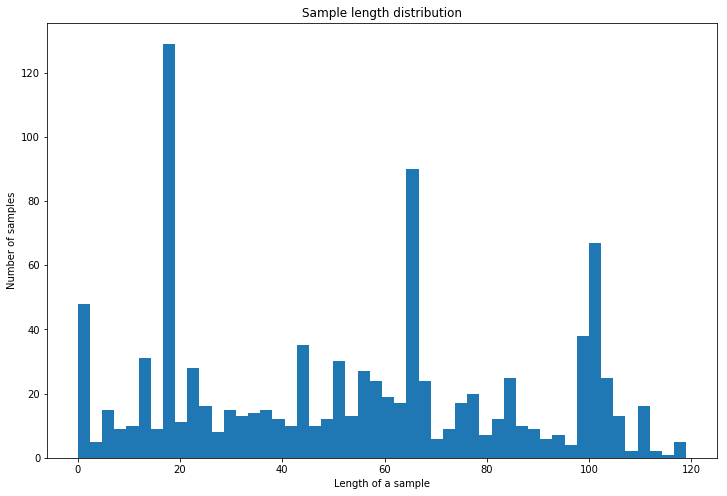

In [12]:
plt.figure(figsize=(12,8))
plot_sample_length_distribution(df_data['text'])

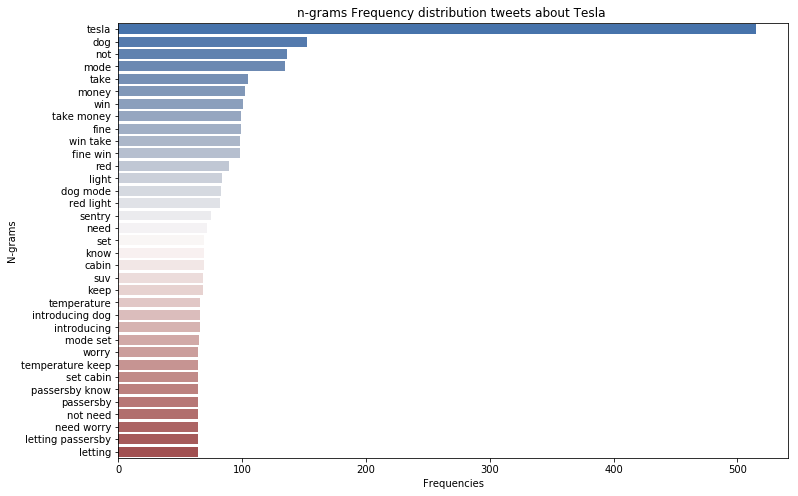

In [13]:
plt.figure(figsize=(12,8))
plot_frequency_distribution_of_ngrams(df_data['text'],ngram_range=(1, 2),
                                      num_ngrams=35,title='n-grams Frequency distribution tweets about Tesla ')

In [ ]:
# lyex, suv, pu

In [23]:
df_data.tail()

,created_at,text
995,2014-09-12,tesla model stops avoid horrific crash
996,2017-10-29,introducing dog mode set cabin temperature kee...
997,2013-12-09,actually kind suction plasma tesla coil syring...
998,2018-07-25,either elon musk goes tesla goes not debate
999,2014-09-15,actually kind suction plasma tesla coil syring...


# Topic_models:

In [24]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from farhad.TopicModels import bag_of_words_for_bigrams,bag_of_words_for_unigrams, make_dictionary
from farhad.TopicModels import evaluate_graph_for_max_label
from farhad.TopicModels import find_probility_for_label, arrowforlebels

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import matplotlib.pyplot as plt
from  dask import delayed 
import pyLDAvis.gensim
import pyLDAvis

import numpy as np
import seaborn as sns
from itertools import chain

In [25]:
df_data = pd.read_csv('Clean_Third_colletion_tesla_tweets(1000_2018-06-18_2014-12-16).csv')
df_data.head(3)

,created_at,text
0,2011-07-19,difference going stellar marketp
1,2013-01-02,get limitations compared tesla os pressuring a...
2,2012-05-08,grandote asi sincero como los que da mi gato t...


In [26]:
%%time
warnings.filterwarnings("ignore")
unigrams = df_data['text'].apply(bag_of_words_for_unigrams)
bigrams =  df_data['text'].apply(bag_of_words_for_bigrams)
bi_uni_grams = unigrams+bigrams
corpus, dictionary = make_dictionary(bi_uni_grams,bi_uni_grams)

CPU times: user 443 ms, sys: 12.3 ms, total: 456 ms
Wall time: 459 ms


In [27]:
import pickle
pickle.dump(dictionary, open('corpus.pkl', 'wb'))
dictionary.save('dictionary1000_tweets_used_tesla.gensim')

nan <generator object evaluate_graph_for_max_label.<locals>.<genexpr> at 0x102f63780>


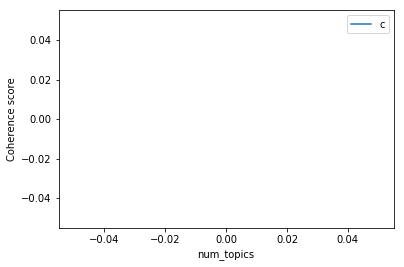

CPU times: user 5.47 s, sys: 178 ms, total: 5.64 s
Wall time: 5.58 s


In [28]:
%%time
evaluate_graph_for_max_label(dictionary,  corpus, bi_uni_grams, limit=5)

In [29]:
%%time
warnings.filterwarnings("ignore")
lda = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary,update_every=1)

CPU times: user 1.56 s, sys: 22.4 ms, total: 1.58 s
Wall time: 1.54 s


In [30]:
plt.figure(figsize=(10,8))
p = pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
p

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      53.059788        1       1  0.040739  0.0
1      46.940220        1       2 -0.040739  0.0, topic_info=     Category        Freq                                     Term  \
term                                                                 
211   Default   43.000000                temperature keep_keep dog   
209   Default   43.000000                           passersby_know   
199   Default   43.000000                      comfortable_letting   
198   Default   43.000000                        cabin_temperature   
210   Default   43.000000              set cabin_cabin temperature   
212   Default   43.000000                    worry_introducing dog   
200   Default   43.000000      dog comfortable_comfortable letting   
202   Default   44.000000                          introducing_dog   
203   Default   43.000000                                 keep_dog   
205   Default   43.000000         letting passersby_passersby know   
208   Default   43.000000                                 not_need   
207   Default   43.000000                               need worry   
206   Default   44.000000                                 mode_set   
201   Default   43.000000                        dog mode_mode set   
204   Default   43.000000                        know not_not need   
864   Default   15.000000                              going_miles   
863   Default   15.000000                  crashed_police released   
871   Default   15.000000  released shocking_shocking surveillance   
874   Default   15.000000         surveillance video_video showing   
866   Default   15.000000                            light crashed   
876   Default   15.000000                            video_showing   
867   Default   15.000000                      miles hour_hour ran   
872   Default   15.000000                    shocking_surveillance   
870   Default   15.000000                        ran red_red light   
868   Default   15.000000                             moment_tesla   
865   Default   15.000000                                 hour_ran   
869   Default   15.000000                          police_released   
873   Default   15.000000              showing moment_moment tesla   
875   Default   15.000000                  tesla going_going miles   
359   Default   17.000000                            actually_kind   
...       ...         ...                                      ...   
199    Topic2   37.819416                      comfortable_letting   
198    Topic2   37.793056                        cabin_temperature   
567    Topic2    2.881947                              fa fa_fa fa   
210    Topic2   37.384270              set cabin_cabin temperature   
212    Topic2   37.348480                    worry_introducing dog   
200    Topic2   37.340797      dog comfortable_comfortable letting   
569    Topic2    2.830144                                    fa_fa   
202    Topic2   37.831951                          introducing_dog   
203    Topic2   36.670429                                 keep_dog   
3180   Topic2    2.250164                                  apa itu   
3185   Topic2    2.241641                                 pamerkan   
3184   Topic2    2.236086                          motors pamerkan   
4523   Topic2    2.235353                                  growing   
3182   Topic2    2.233113                              mode anjing   
205    Topic2   36.216896         letting passersby_passersby know   
208    Topic2   36.091286                                 not_need   
207    Topic2   35.640030                               need worry   
206    Topic2   35.984108                                 mode_set   
201    Topic2   35.352119                        dog mode_mode set   
204    Topic2   34.858780                        know not_not need   
250    Topic2   21.365858                          

<Figure size 720x576 with 0 Axes>

In [32]:
%%timwe
pyLDAvis.save_html(p, 'lda1000_for_Tesla_company.html')

UsageError: Cell magic `%%timwe` not found.


In [33]:
%%time
probability_list,lebal_list = find_probility_for_label(lda, corpus)
prob,arrow_probability =  arrowforlebels(probability_list,lebal_list,num_topics=2)

threshold for probability: 0.5000000011785887
CPU times: user 655 ms, sys: 23.1 ms, total: 678 ms
Wall time: 666 ms


Text(0.5, 1.0, 'possible for every class (LDA classfication)')

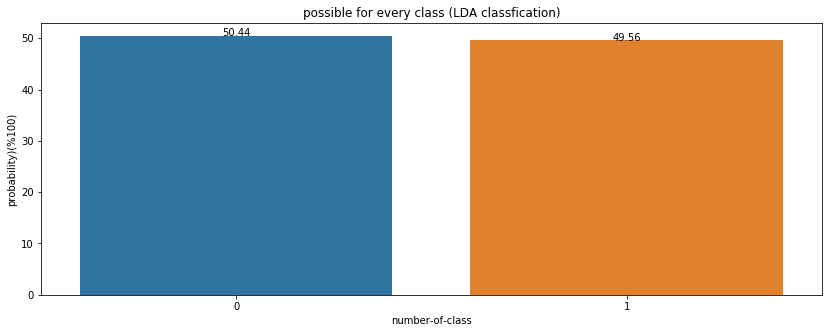

In [35]:
plt.figure(figsize=(14,5))
g = sns.barplot(x=np.arange(0,2),y=prob)
for i in range(2):
      g.text(i,prob[i], round(prob[i],2), color='black', ha="center")
plt.xlabel("number-of-class")
plt.ylabel('probability)(%100)')
plt.title('possible for every class (LDA classfication)')

In [36]:
def stick_label(arrow_probability):
    label= []
    for probs in arrow_probability:
        for num,prob in enumerate(probs):
            if prob == max(probs):
                label.append(num)
    return label
label_list = stick_label(arrow_probability)

In [37]:
df_data['label_topicModels'] = label_list
df_data.head()

,created_at,text,label_topicModels
0,2011-07-19,difference going stellar marketp,1
1,2013-01-02,get limitations compared tesla os pressuring a...,0
2,2012-05-08,grandote asi sincero como los que da mi gato t...,0
3,2014-10-25,fine win take money,1
4,2012-05-01,tesla model versus giant snow drift highway video,1


In [38]:
df_data.to_csv('data/tesla1000_topic_models.csv',index=False)